In [1]:
import os
os.environ["OMP_NUM_THREADS"] = "1"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['SimSun']  # 使用中文宋体字体
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [3]:
protein = pd.read_table('protein.txt', sep = '\t')
protein.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [4]:
protein.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [5]:
# 删除名为Country的数据

In [6]:
sprotein = protein.drop(['Country'], axis = 1)
sprotein.head()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [7]:
# Z-Score标准化方法
from sklearn import preprocessing
sprotein_scaled = preprocessing.scale(sprotein)
sprotein_scaled

array([[ 0.08294065, -1.79475017, -2.22458425, -1.1795703 , -1.22503282,
         0.9348045 , -2.29596509,  1.24796771, -1.37825141],
       [-0.28297397,  1.68644628,  1.24562107,  0.40046785, -0.6551106 ,
        -0.39505069, -0.42221774, -0.91079027,  0.09278868],
       [ 1.11969872,  0.38790475,  1.06297868,  0.05573225,  0.06479116,
        -0.5252463 ,  0.88940541, -0.49959828, -0.07694671],
       [-0.6183957 , -0.52383718, -1.22005113, -1.2657542 , -0.92507375,
         2.27395937, -1.98367386,  0.32278572,  0.03621022],
       [-0.03903089,  0.96810416, -0.12419682, -0.6624669 , -0.6851065 ,
         0.19082957,  0.45219769, -1.01358827, -0.07694671],
       [ 0.23540507,  0.8023329 ,  0.69769391,  1.13303099,  1.68457011,
        -0.96233157,  0.3272812 , -1.21918427, -0.98220215],
       [-0.43543839,  1.02336124,  0.69769391, -0.86356267,  0.33475432,
        -0.71124003,  1.38907137, -1.16778527, -0.30326057],
       [-0.10001666, -0.82775116, -0.21551801,  2.38269753,  0

In [8]:
# K值选择
from sklearn.cluster import KMeans

NumberOfClusters = range(1, 20)
kmeans = [KMeans(n_clusters=i, n_init=10) for i in NumberOfClusters]
score = [kmeans[i].fit(sprotein_scaled).score(sprotein_scaled) for i in range(len(kmeans))]
score

[-225.00000000000006,
 -139.50737044831814,
 -110.40242709032154,
 -90.8889809631546,
 -75.85361543875909,
 -64.41229361717092,
 -52.68794493054984,
 -48.29047751327068,
 -41.32074770032405,
 -35.74386672757604,
 -31.51621891683155,
 -26.703090685653525,
 -22.795025142569653,
 -19.994779808483038,
 -16.005139729280923,
 -13.555298614016586,
 -10.995301496930027,
 -8.545460381665688,
 -6.711506904938577]

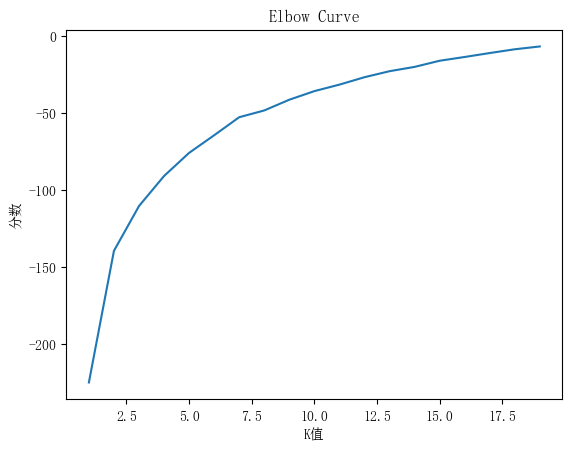

In [9]:
# 绘制ROC曲线
%matplotlib inline
plt.plot(NumberOfClusters, score)
plt.xlabel('K值')
plt.ylabel('分数')
plt.title('Elbow Curve')
plt.show()

In [10]:
# 随机设定聚类的数量未5，并以此为基础在数据矩阵上执行均值聚类
myKmeans = KMeans(algorithm="auto", n_clusters=5, n_init=10, max_iter=200, verbose=1)
myKmeans.fit(sprotein_scaled)
y_kmeans = myKmeans.predict(sprotein)
print(y_kmeans)

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


Initialization complete
Iteration 0, inertia 106.35542701965905.
Iteration 1, inertia 78.88010436194581.
Iteration 2, inertia 77.59268852636096.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 106.35542701965905.
Iteration 1, inertia 78.88010436194581.
Iteration 2, inertia 77.59268852636096.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 102.44650296958314.
Iteration 1, inertia 77.59268852636096.
Converged at iteration 1: strict convergence.
Initialization complete
Iteration 0, inertia 117.39141342751493.
Iteration 1, inertia 79.29425961128416.
Iteration 2, inertia 77.70858605396458.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 106.35542701965905.
Iteration 1, inertia 78.88010436194581.
Iteration 2, inertia 77.59268852636096.
Converged at iteration 2: strict convergence.
Initialization complete
Iteration 0, inertia 117.00609403106942.
Iteration 1, inertia

D:\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


In [11]:
protein["所隶属的类簇"] = y_kmeans
protein

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg,所隶属的类簇
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7,1
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3,3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0,3
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2,1
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0,0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4,2
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6,3
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4,2
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5,3
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5,1


In [12]:
# 计算K=5时的轮廓系数
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(sprotein_scaled, y_kmeans)
# silhouette_avg
print("当K=", myKmeans.n_clusters, "时，轮廓系数为：", silhouette_avg)

当K= 5 时，轮廓系数为： 0.14859492298043933


D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  s

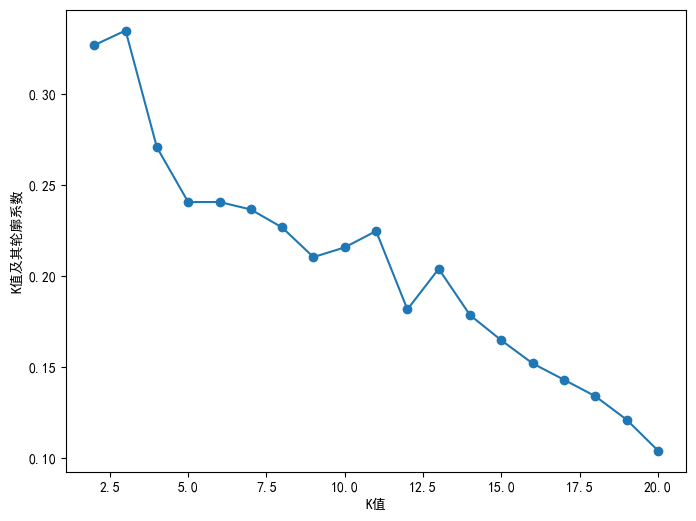

In [13]:
# 计算K=2到20时的轮廓系数
# 定义可能的K值范围
k_range = range(2, 21)

# 用于存储每个K值对应的轮廓系数
silhouette_avgs = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0)   # 设定聚类模型的参数
    cluster_labels = kmeans.fit_predict(sprotein_scaled)    # 获取聚类结果
    silhouette_avg = silhouette_score(sprotein_scaled, cluster_labels)
    silhouette_avgs.append(silhouette_avg)

# 绘制K值和对应的轮廓系数
plt.figure(figsize=(8, 6))
plt.rcParams["font.family"] = "simHei"  # 汉字显示
plt.plot(k_range, silhouette_avgs, "o-")
plt.xlabel("K值")
plt.ylabel("K值及其轮廓系数")
plt.show()

In [14]:
# from Bio.Cluster import kcluster
# from sklearn.metrics import silhouette_score
# clusters, error, nfound = kcluster(sprotein_scaled, nclusters=5, dist='u', npass=100)
# silhouette_avg = silhouette_score(sprotein_scaled, clusters, metric='cosine')

In [15]:
# # 设置聚类数量范围
# NumberOfClusters = range(2, 21)

# # 初始化轮廓系数列表
# silhouette_scores = []

# # 计算每个聚类数量的轮廓系数
# for n_clusters in NumberOfClusters:
#     clusters, _, _ = kcluster(sprotein_scaled, nclusters=n_clusters, dist='u', npass=100)
#     silhouette_avg = silhouette_score(sprotein_scaled, clusters, metric='cosine')
#     silhouette_scores.append(silhouette_avg)

# # 绘制图像
# plt.plot(NumberOfClusters, silhouette_scores, marker='o')
# plt.xlabel('K值')
# plt.ylabel('轮廓系数')
# plt.title('K值及轮廓系数')
# plt.grid(True)
# plt.show()

D:\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: algorithm='auto' is deprecated, it will be removed in 1.3. Using 'lloyd' instead.
  warnings.warn(


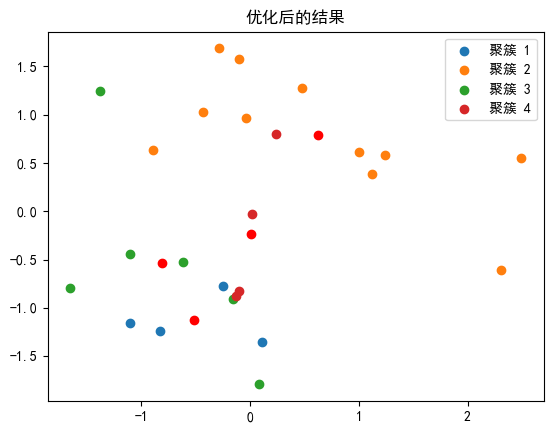

In [16]:
estimator = KMeans(algorithm="auto", n_clusters=4, n_init=10, max_iter=200, verbose=0)
estimator.fit(sprotein_scaled)

# 绘制聚类结果的散点图
for i in range(4):
    plt.scatter(sprotein_scaled[estimator.labels_ == i, 0], 
                sprotein_scaled[estimator.labels_ == i, 1], 
                label=f'聚簇 {i+1}')

plt.scatter(estimator.cluster_centers_[:, 0], estimator.cluster_centers_[:, 1],  c='red')
plt.title('优化后的结果')
plt.legend()
plt.show()